<a href="https://colab.research.google.com/github/Harshnagwani123/ML_TRAINING/blob/main/ML_DAY_6(B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DECISION TREE AND RANDOM FOREST ON TITANIC DATASET

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv('/content/train.csv')


In [4]:
y = df["Survived"]
X = df[["Pclass", "Sex", "Age", "Fare", "Embarked"]].copy()


In [5]:
X["Age"] = X["Age"].fillna(X["Age"].median())
X["Embarked"] = X["Embarked"].fillna("S")


In [8]:
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [11]:
print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


0.776536312849162
              precision    recall  f1-score   support

           0       0.77      0.92      0.83       110
           1       0.81      0.55      0.66        69

    accuracy                           0.78       179
   macro avg       0.79      0.73      0.74       179
weighted avg       0.78      0.78      0.77       179



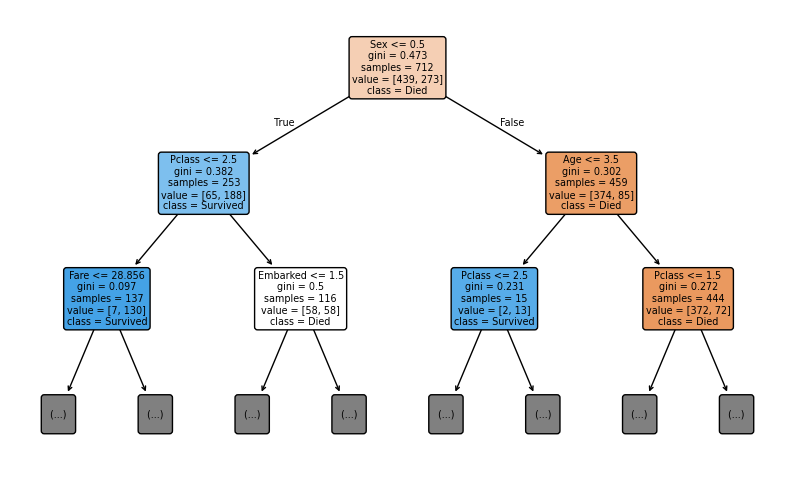

In [18]:
plt.figure(figsize=(10,6))
plot_tree(dt, feature_names=X.columns, class_names=["Died", "Survived"], filled=True, rounded=True, max_depth=2)
plt.show()

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [15]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8212290502793296
Random Forest Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [16]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features:\n", importances)

Top Features:
 Fare        0.317289
Sex         0.275194
Age         0.273414
Pclass      0.097542
Embarked    0.036561
dtype: float64


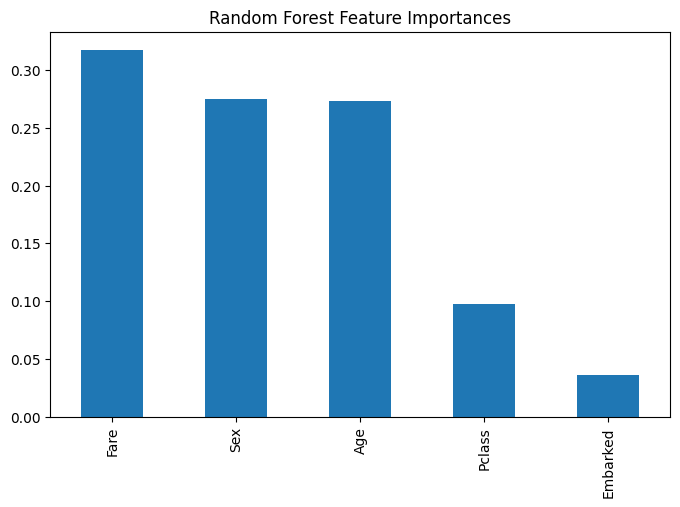

In [17]:
plt.figure(figsize=(8,5))
importances.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.show()
